In [13]:
# import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
# Load The Dataset
df = pd.read_csv("customer_segmentation.csv")
df.head()

,Customer ID,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Customer ID     24 non-null     int64
 1   Age             24 non-null     int64
 2   Annual_Income   24 non-null     int64
 3   Spending_Score  24 non-null     int64
dtypes: int64(4)
memory usage: 900.0 bytes


In [25]:
# Dataset Selection
X = df[['Age', 'Annual_Income', 'Spending_Score']]

In [19]:
# Fetures Scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

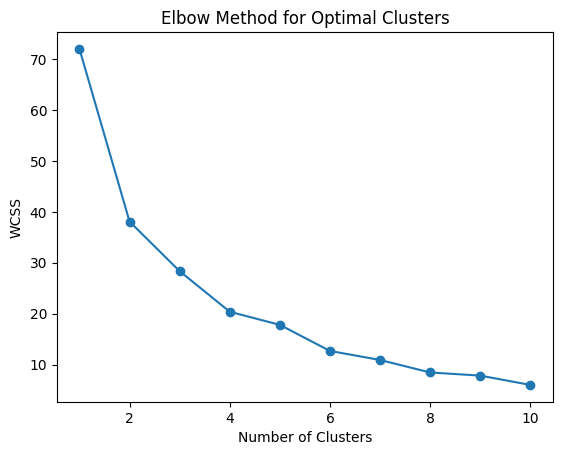

In [20]:
# Optimal Cluster Selection
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [21]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [22]:
df.head()

,Customer ID,Age,Annual_Income,Spending_Score,Cluster
0,1,19,15,39,2
1,2,21,15,81,1
2,3,20,16,6,2
3,4,23,16,77,1
4,5,31,17,40,2


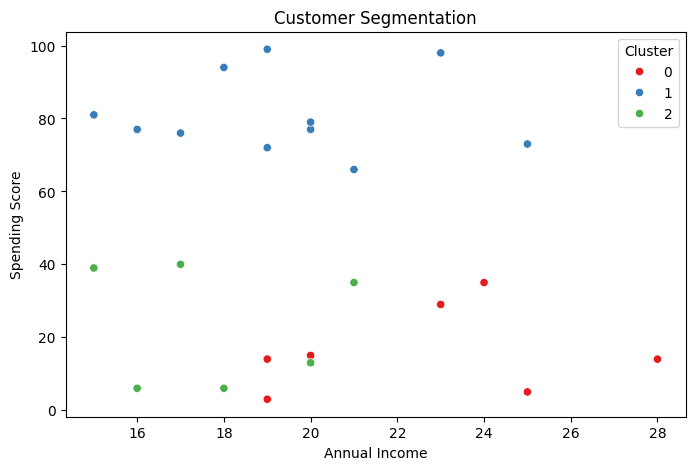

In [23]:
# Cluster Visulization
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['Annual_Income'],
    y=df['Spending_Score'],
    hue=df['Cluster'],
    palette='Set1'
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()

In [24]:
# Cluster INterPretation
df.groupby('Cluster').mean()

,Customer ID,Age,Annual_Income,Spending_Score
Cluster,,,,
0,17.142857,52.285714,22.571429,16.428571
1,12.000000,24.818182,19.363636,81.090909
2,8.000000,29.500000,17.833333,23.166667
